In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\after 10 minutes\2024-01-19 17.49.22 vid\Allied Vision Technologies GS650 0001f61c\*tif"
frame_rate = 120
frame_limit = 1000

In [3]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.max_frames = frame_limit
oog.settings["normalise_sad"] = True
oog.run()

oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.max_frames = frame_limit
oog2.run()

Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\after 10 minutes\2024-01-19 17.49.22 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Getting SADs
Getting phases
Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\after 10 minutes\2024-01-19 17.49.22 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Getting SADs
Getting phases


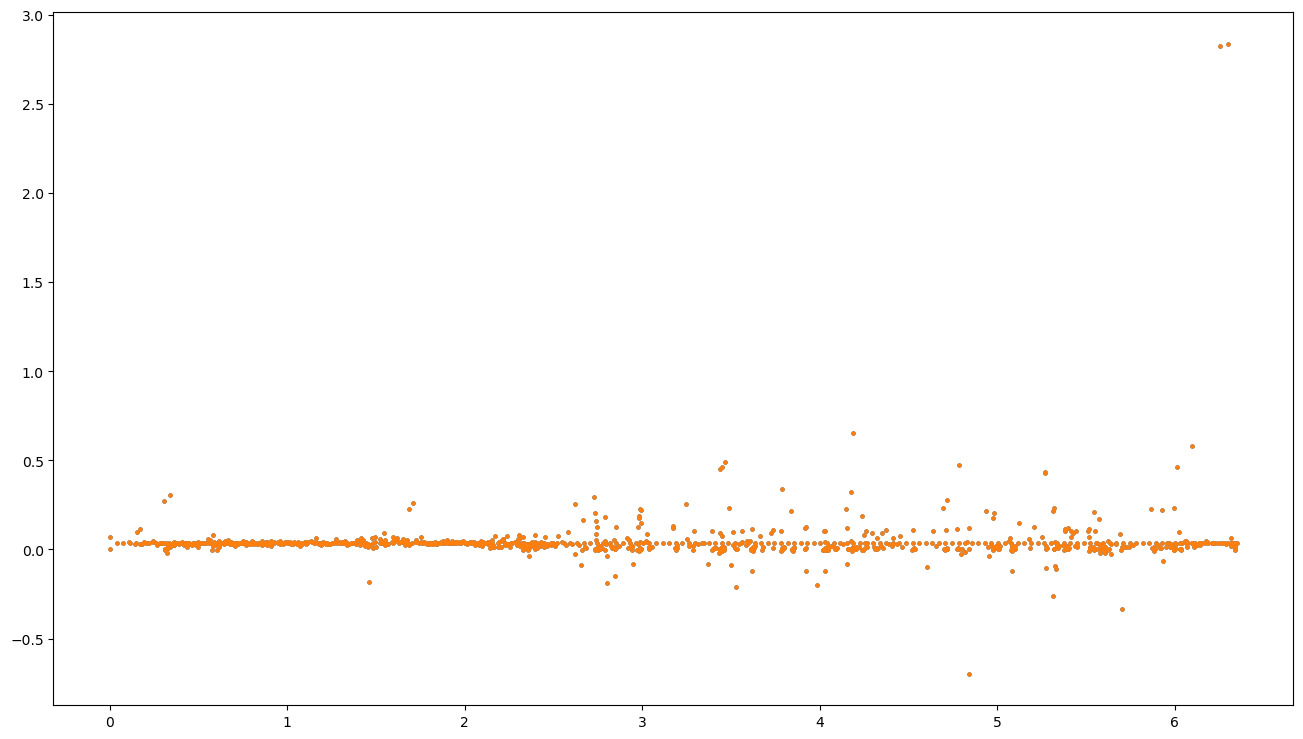

In [4]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, s = 5)
plt.scatter(oog2.phases[1::], oog2.delta_phases, s = 5)
plt.show()

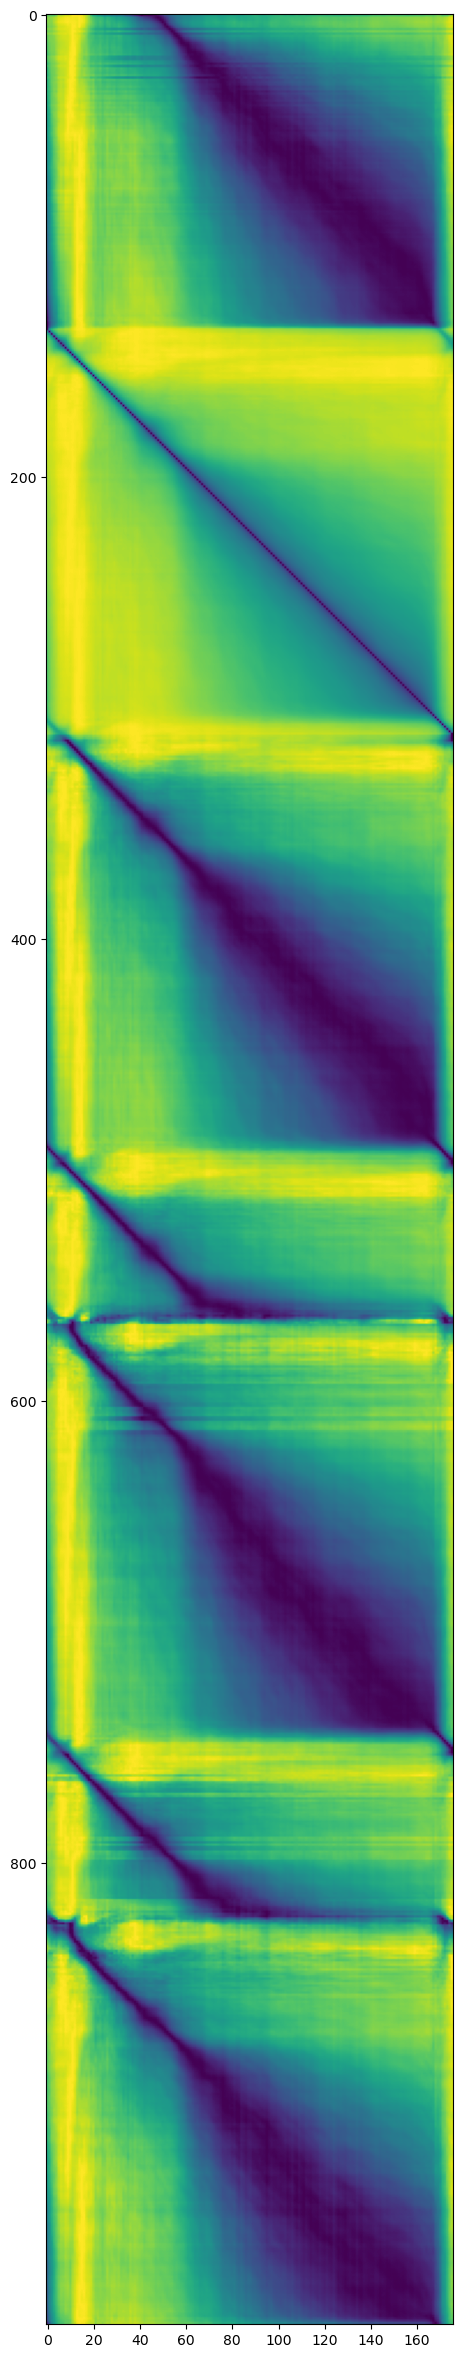

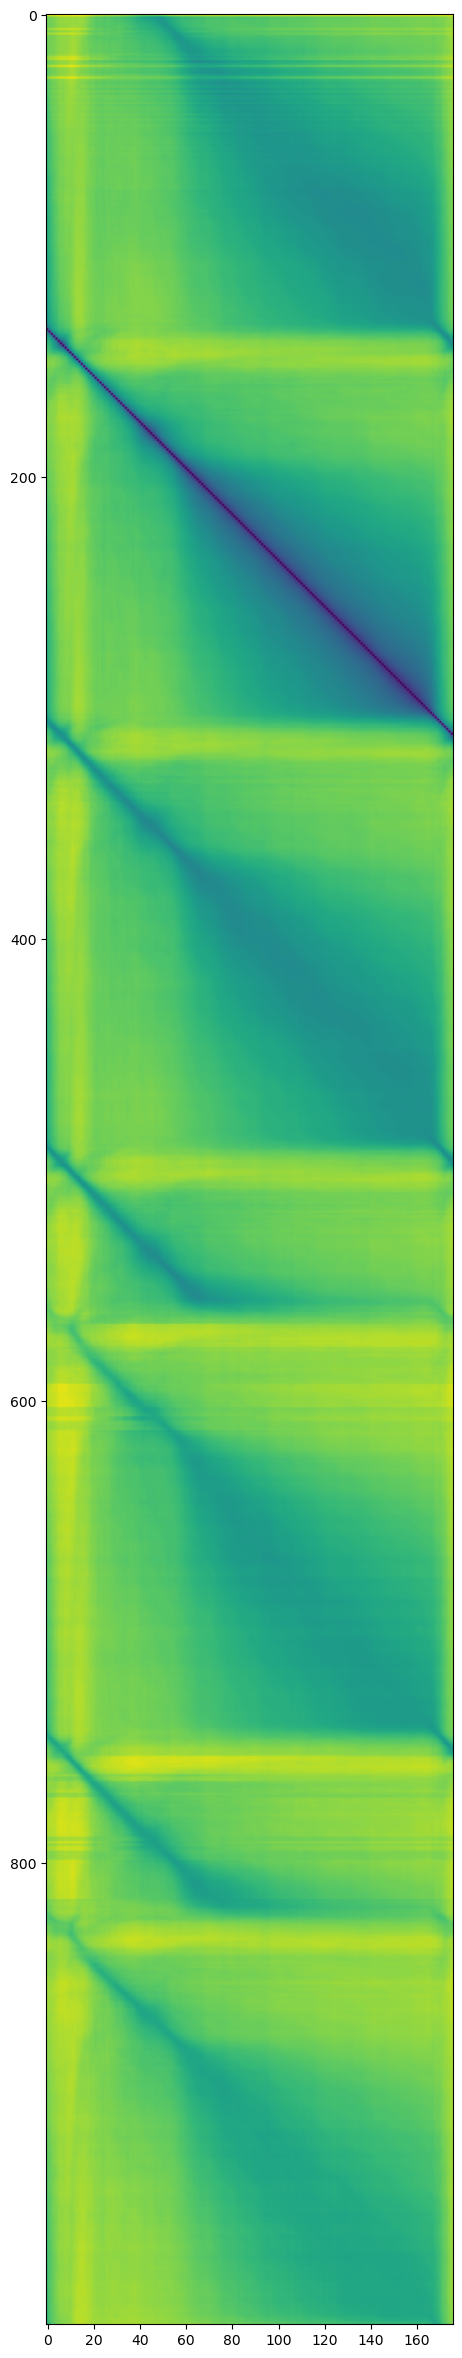

In [5]:
plt.figure(figsize = (10, 30))
plt.imshow(oog.sads)
plt.show()
plt.figure(figsize = (10, 30))
plt.imshow(oog2.sads)
plt.show()

In [6]:
print(oog.phases.shape[0])
print(oog2.phases.shape[0])
print(oog2.sequence_manager.reference_indices)

1000
1000
[23, 199]


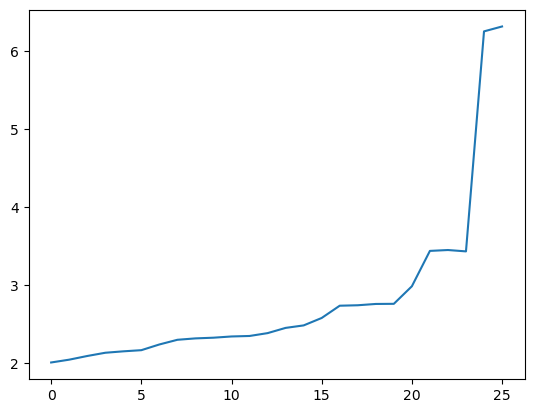

In [7]:
plt.plot(oog2.phases[800:826])

IndexError: list index out of range

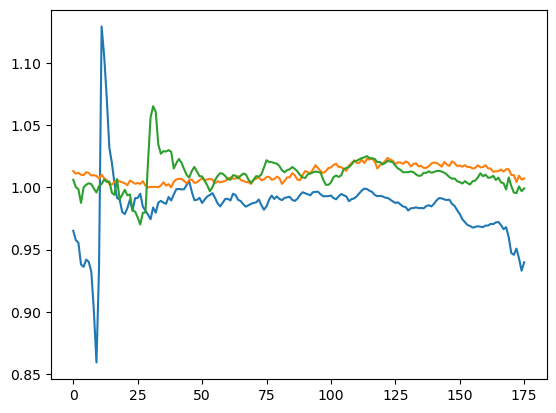

In [8]:
for i in range(500, 2000, oog2.sequence_manager.reference_sequence.shape[0]):
    plt.plot(oog2.sads[i] / oog2.sads[i + 1])
plt.xlim(25,175)
plt.ylim(0.9,1.1)
plt.legend()

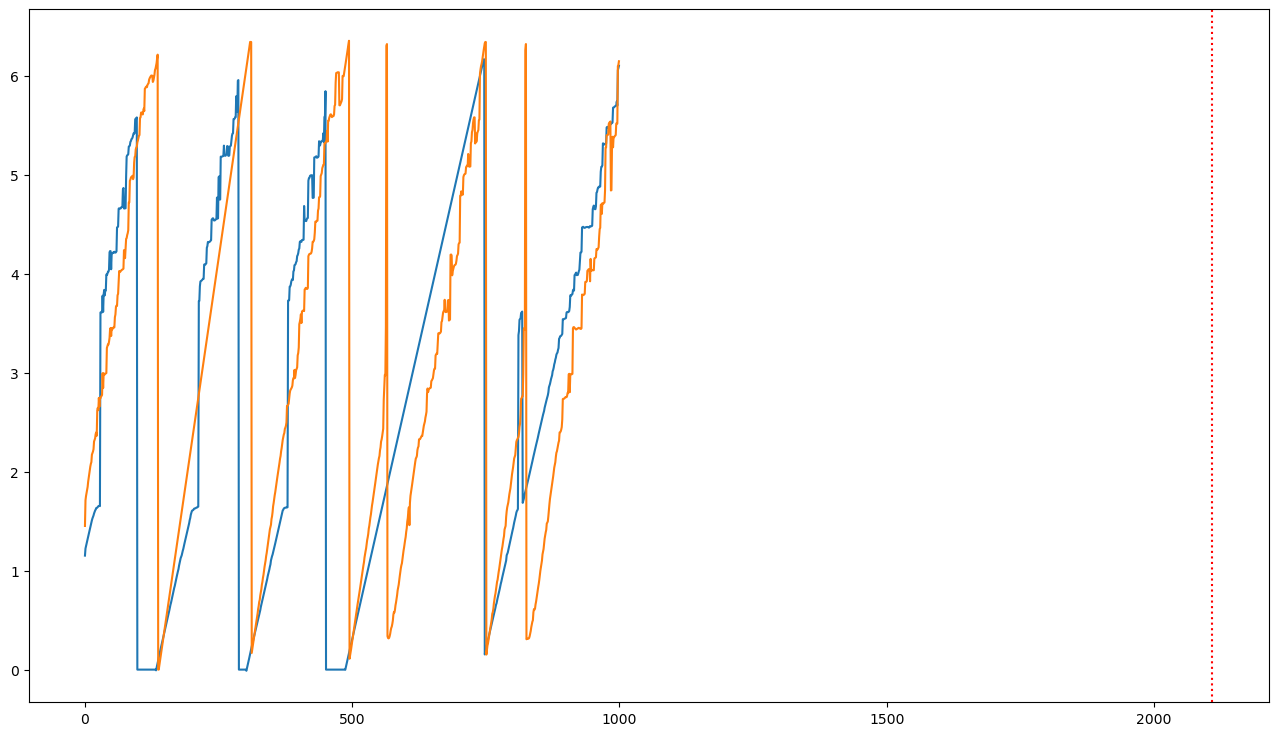

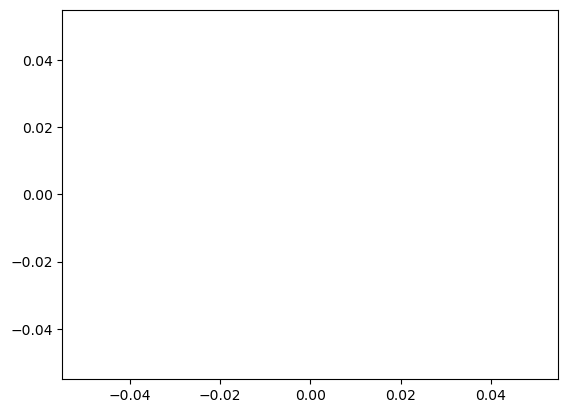

In [ ]:
plt.figure(figsize = (16,9))
plt.plot(oog.phases)
plt.plot(oog2.phases)
plt.axvline(2109, c = "red", ls = ":")
plt.show()

plt.plot((oog.phases - oog2.phases)[1000:1500])
plt.show()

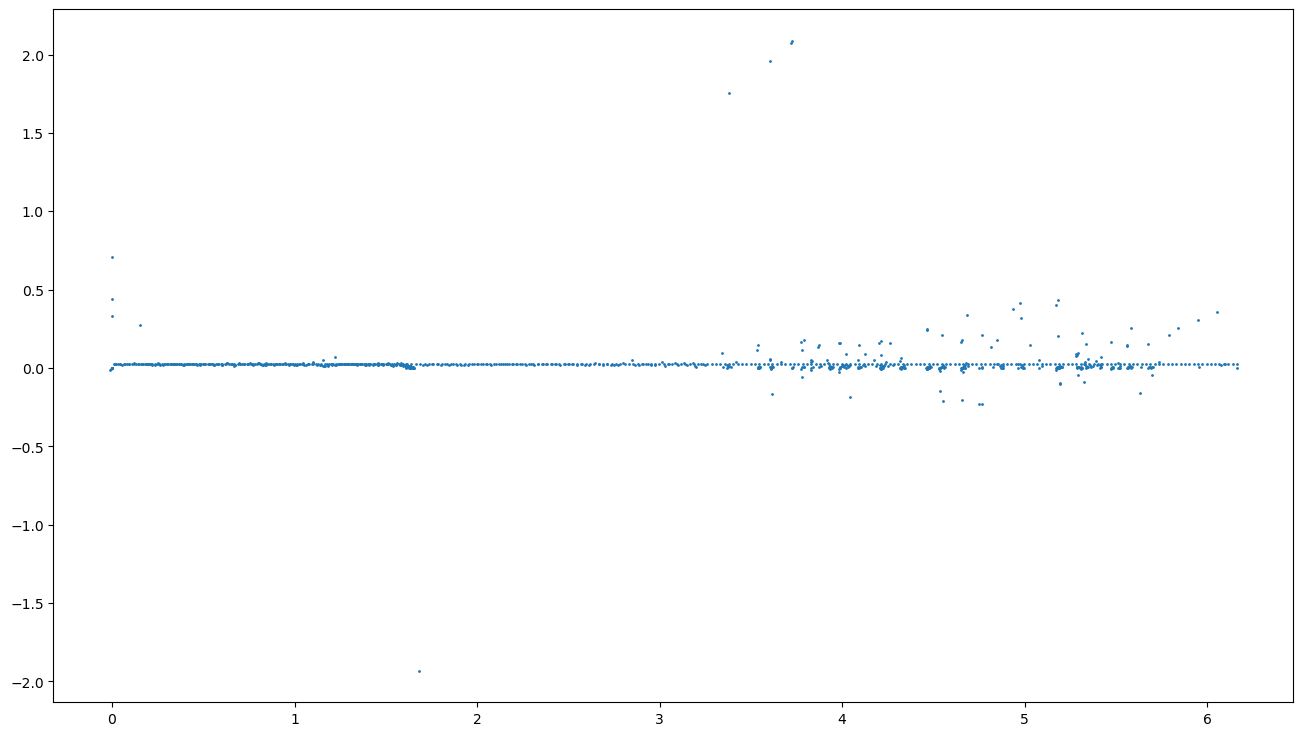

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, s = 1)
plt.show()

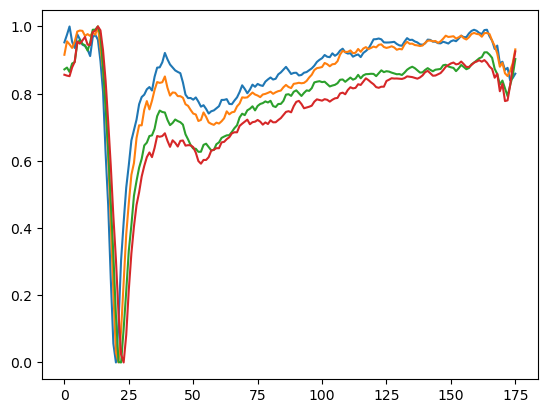

In [ ]:
plt.plot(oog2.sads[510])
plt.plot(oog2.sads[511])
plt.plot(oog2.sads[512])
plt.plot(oog2.sads[513])
plt.show()


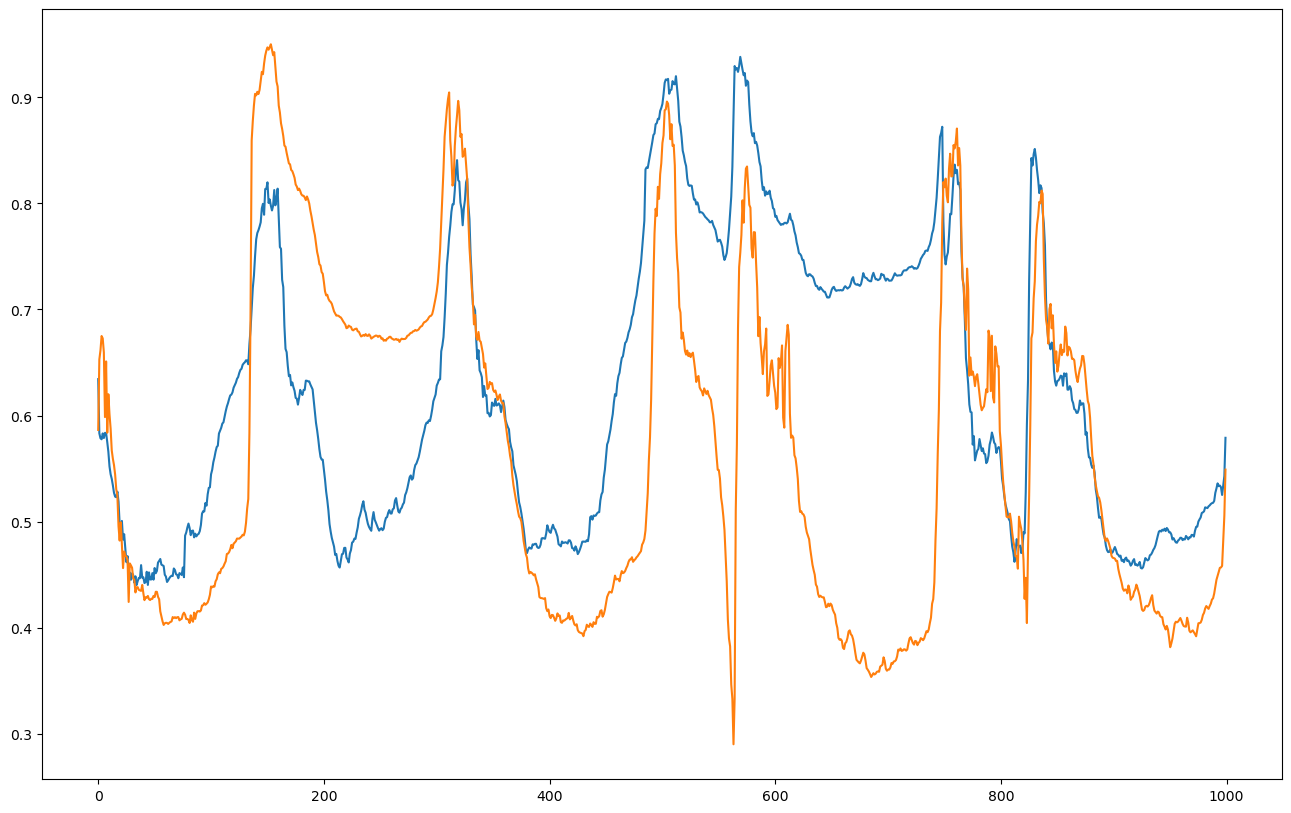

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(np.mean(np.array(oog.sads)[:,2:-2], axis = 1))
plt.plot(np.mean(np.array(oog2.sads)[:,2:-2], axis = 1))

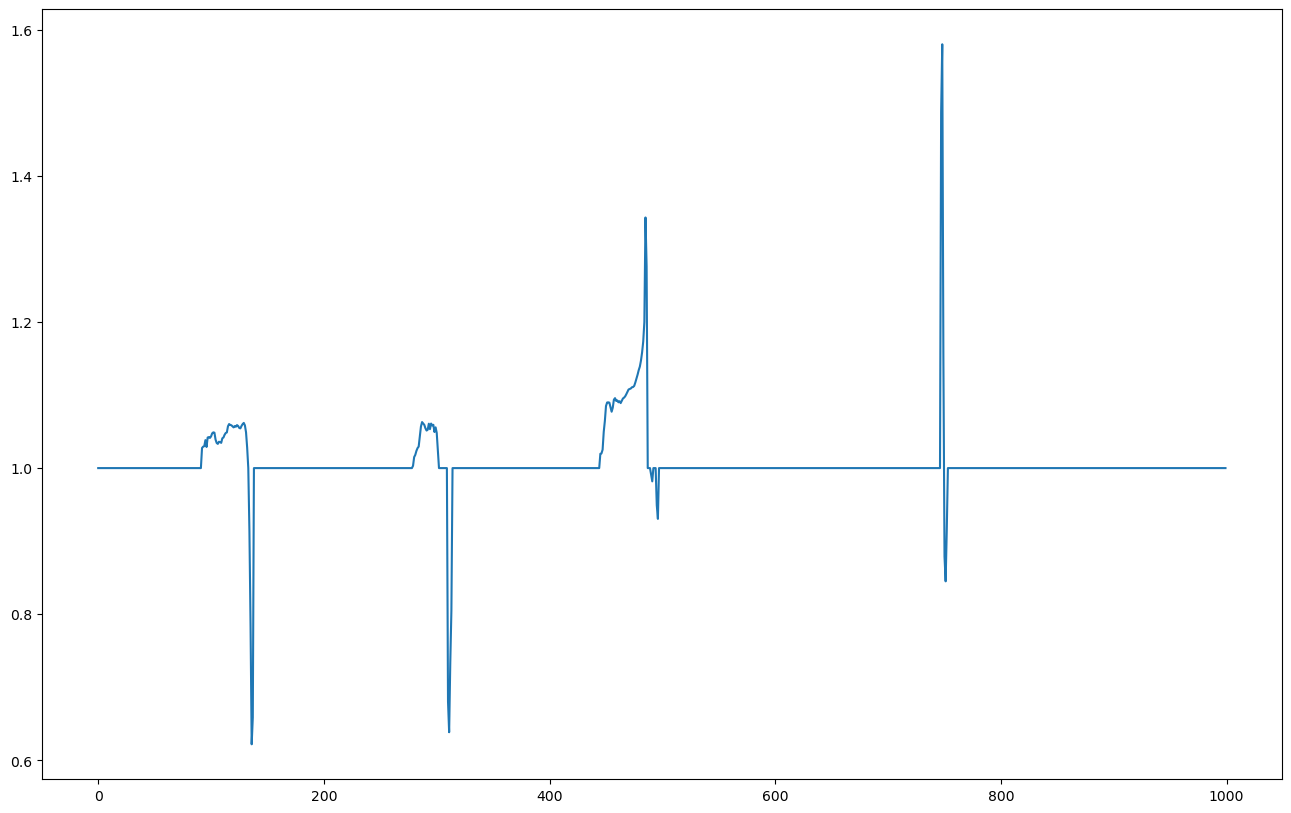

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(np.min(np.array(oog.sads)[:,2:-2] + 1, axis = 1) / np.min(np.array(oog2.sads)[:,2:-2] + 1, axis = 1))
plt.show()

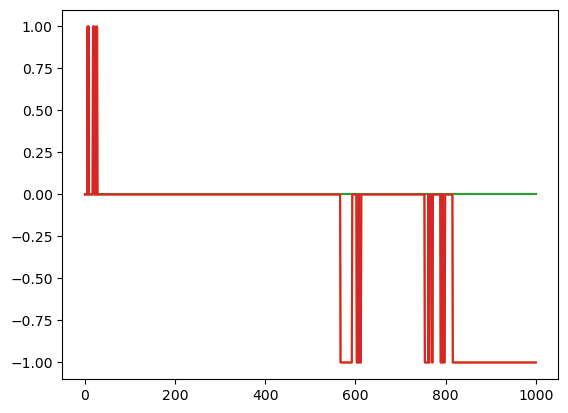

In [ ]:
plt.plot(oog.drifts)
plt.plot(oog2.drifts)